<a href="https://colab.research.google.com/github/matsunori39/ml_interpret_book/blob/main/ml_interpret_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/ghmagazine/ml_interpret_book

# 2章 線形回帰モデルを通じて「解釈性」を理解する

## 2.3 実データでの線形モデルの分析

### 2.3.1 データの読み込み

In [3]:
import sys
import warnings
from dataclasses import dataclass
from typing import Any  # 型ヒント用
from __future__ import annotations  # 型ヒント用

In [4]:
!pip install japanize_matplotlib -q

     |████████████████████████████████| 4.1 MB 2.7 MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib  # matplotlibの日本語対応

In [6]:
!git clone https://github.com/ghmagazine/ml_interpret_book

Cloning into 'ml_interpret_book'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 4), reused 25 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [7]:
# 自作モジュール
sys.path.append("./ml_interpret_book")
from mli.visualize import get_visualization_setting

In [8]:
np.random.seed(42)
pd.options.display.float_format = "{:.2f}".format
sns.set(**get_visualization_setting())
warnings.simplefilter("ignore") # warningsを非表示に

In [9]:
from sklearn.datasets import load_boston

In [10]:
# データセットの読み込み
boston = load_boston()

In [11]:
# データセットはdictで与えられる
# dataに特徴量が、targetに目的変数が格納されている
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

### 2.3.2 データの前処理

In [12]:
def plot_histgram(x, title=None, x_label=None):
  """与えられた特徴量のヒストグラムを作成"""

  fig, ax = plt.subplots()
  sns.distplot(x, kde=False, ax=ax)
  fig.suptitle(title)
  ax.set_xlabel(x_label)

  fig.show()

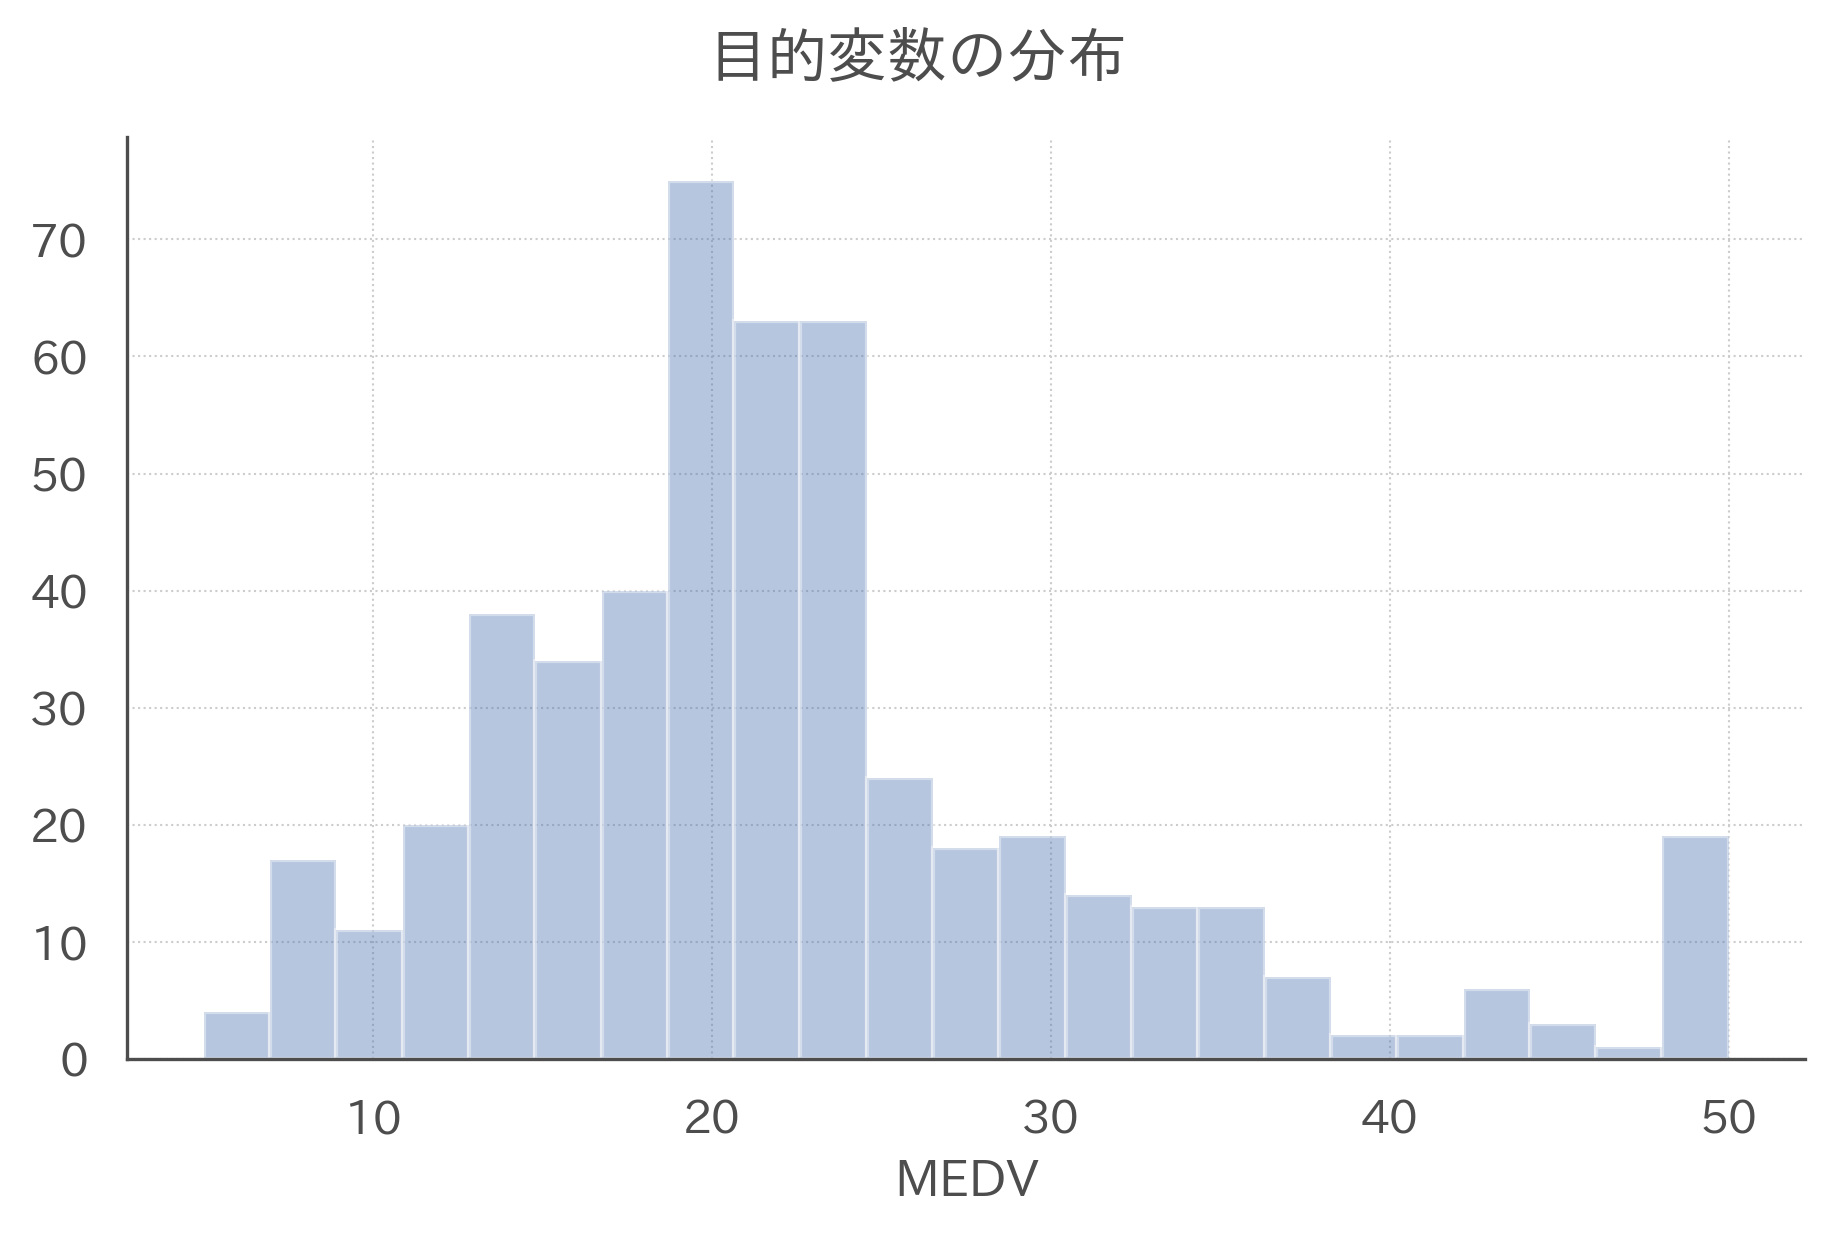

In [13]:
plot_histgram(y, title="目的変数の分布", x_label="MEDV")

In [14]:
# 特徴量を抽出
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [15]:
def plot_scatters(X, y, title=None):
  """目的変数と特徴量の散布図を作成"""

  cols = X.columns
  fig, axes = plt.subplots(nrows=2, ncols=2)

  for ax, c in zip(axes.ravel(), cols):
    sns.scatterplot(X[c], y, ci=None, ax=ax)
    ax.set(ylabel="MEDV")
  
  fig.suptitle(title)

  fig.show()

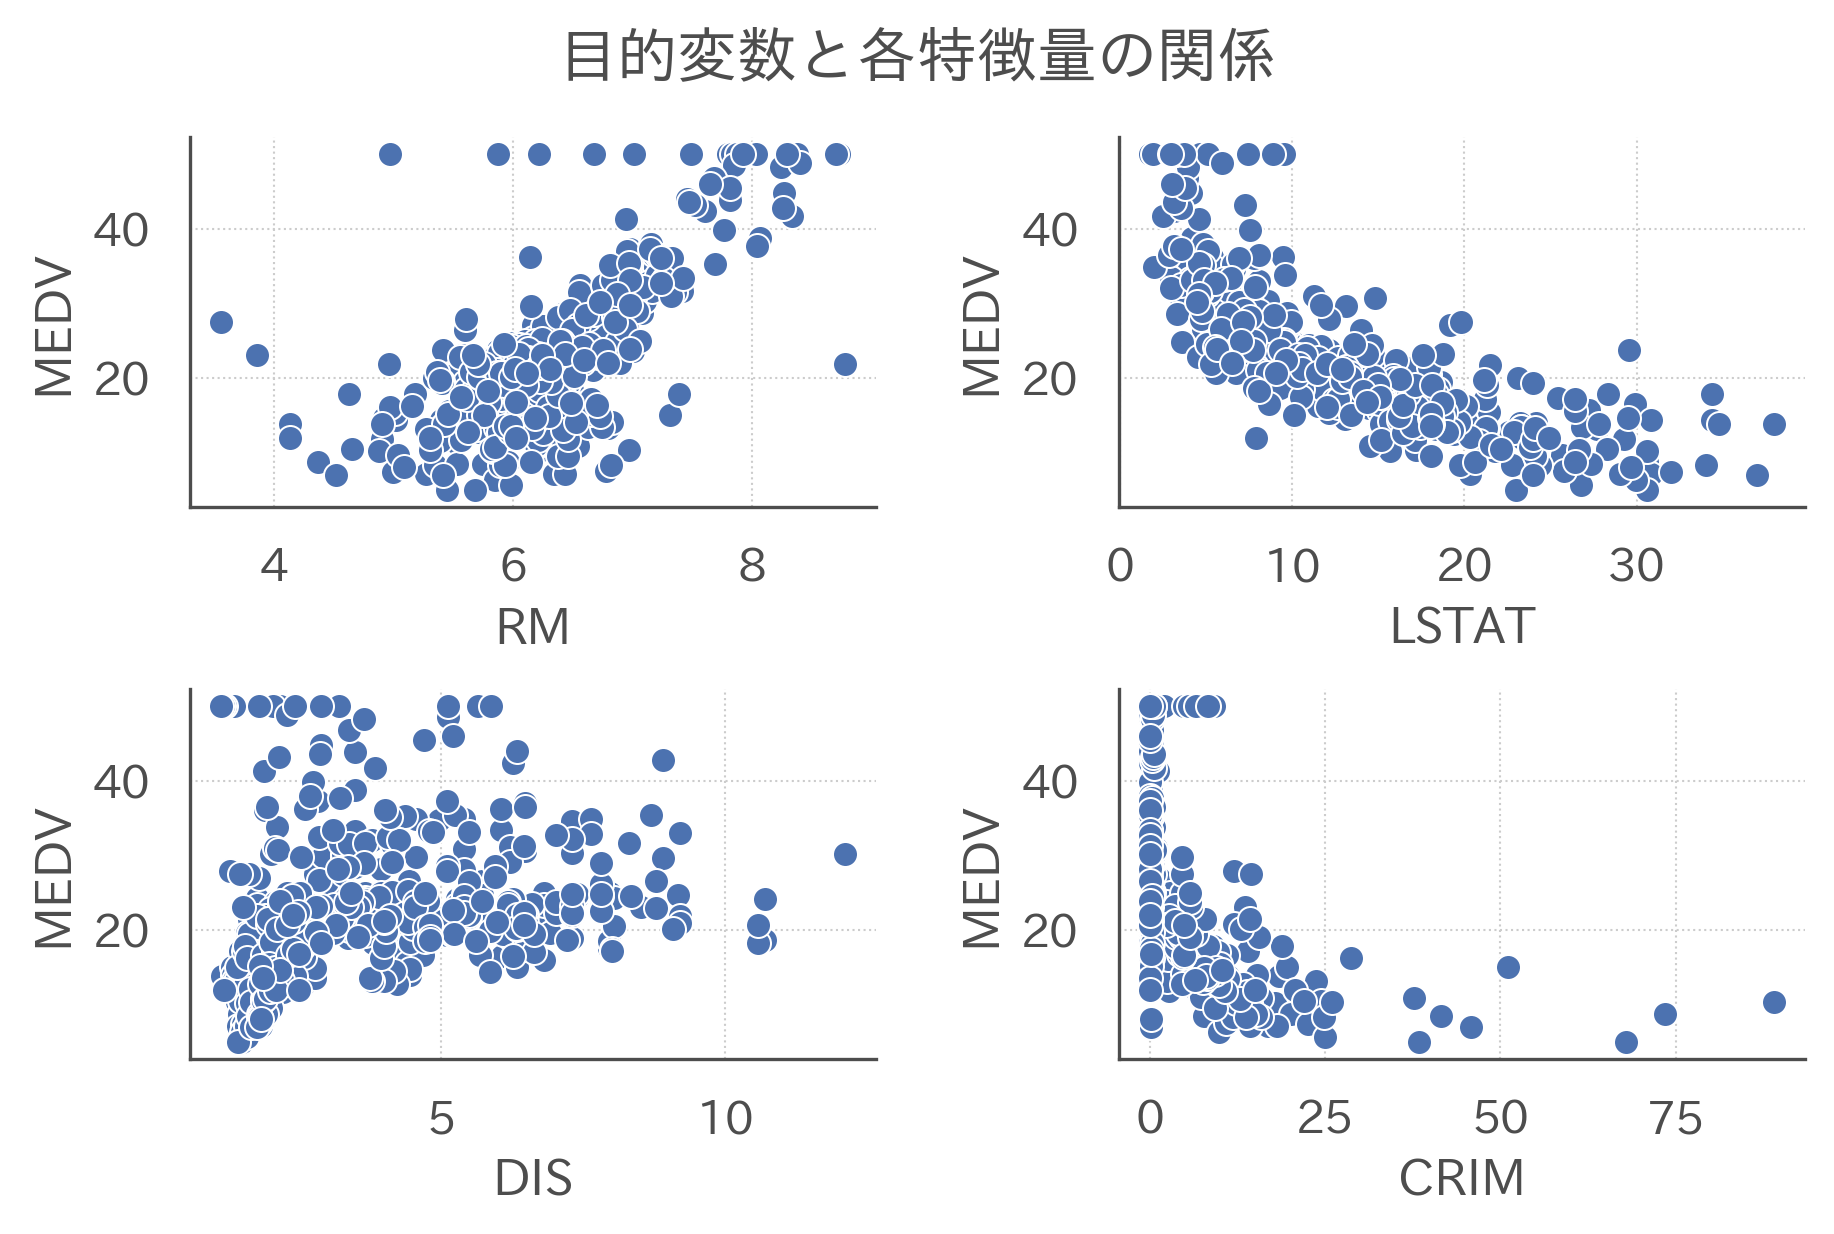

In [16]:
plot_scatters(
    X[["RM", "LSTAT", "DIS", "CRIM"]],
    y,
    title="目的変数と各特徴量の関係"
)

### 2.3.3 線形モデルの学習と評価

In [17]:
from sklearn.model_selection import train_test_split
import joblib   # pickleデータの書き出しと読み込み

In [18]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# あとで使えるようにデータを書き出しておく
joblib.dump(
    [X_train, X_test, y_train, y_test],
    filename="./ml_interpret_book/data/boston_housing.pkl"
)

['./ml_interpret_book/data/boston_housing.pkl']

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# 学習
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### 2.3.4 予測誤差の計算